In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from google.colab import drive
drive.mount('/content/drive')

X_train = pd.read_csv('/content/drive/My Drive/ML_Data/X_train_scaled.csv')
X_test = pd.read_csv('/content/drive/My Drive/ML_Data/X_test_scaled.csv')
y_train = pd.read_csv('/content/drive/My Drive/ML_Data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/ML_Data/y_test.csv')

X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values



Mounted at /content/drive


Window Creation

In [7]:
def create_windowed_data(X, y, window_size=8):
    Xw, yw = [], []
    for i in range(len(X) - window_size):
        Xw.append(X[i:i+window_size])
        yw.append(y[i+window_size])
    return np.array(Xw), np.array(yw)

WINDOW = 8

X_train_w, y_train_w = create_windowed_data(X_train, y_train, window_size=WINDOW)
X_test_w,  y_test_w  = create_windowed_data(X_test,  y_test,  window_size=WINDOW)

print("Windowed Shapes:")
print("X_train_w:", X_train_w.shape)
print("y_train_w:", y_train_w.shape)
print("X_test_w :", X_test_w.shape)

Windowed Shapes:
X_train_w: (1646, 8, 2)
y_train_w: (1646, 1)
X_test_w : (406, 8, 2)


Building a very small MLP for a TinyNN

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(WINDOW, 2)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [9]:
history = model.fit(
    X_train_w, y_train_w,
    validation_data=(X_test_w, y_test_w),
    epochs=40,
    batch_size=32,
    verbose=1
)


Epoch 1/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 126152.3672 - mae: 350.8749 - val_loss: 138597.7969 - val_mae: 368.4087
Epoch 2/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 126095.1797 - mae: 351.1319 - val_loss: 136617.9219 - val_mae: 365.6310
Epoch 3/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 122150.1250 - mae: 344.3868 - val_loss: 132844.7344 - val_mae: 360.2584
Epoch 4/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120896.5312 - mae: 342.0052 - val_loss: 126139.5703 - val_mae: 350.4894
Epoch 5/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116212.1719 - mae: 334.4286 - val_loss: 115544.3750 - val_mae: 334.3109
Epoch 6/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110567.4766 - mae: 323.6497 - val_loss: 100617.5156 - val_mae: 309.7822
Epoch 7/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 105662.9453 - mae: 315.6331 - val_loss: 82032.2969 - val_mae: 275.5265
Epoch 8/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 94920.2656 - mae: 295.9221 - va

Make predictions on the test set and then visualize them against the actual values.

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


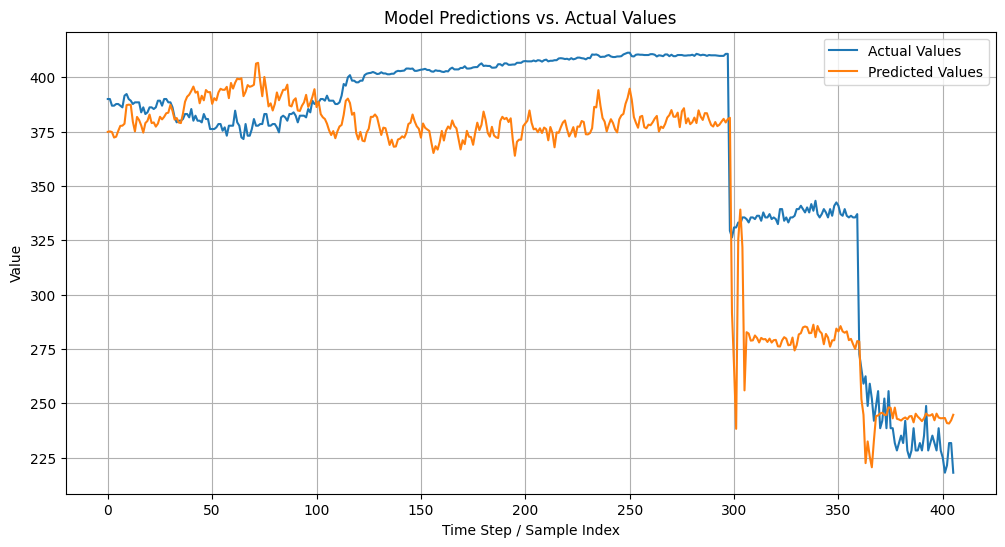

In [10]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_w = model.predict(X_test_w)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_w, label='Actual Values')
plt.plot(y_pred_w, label='Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Time Step / Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

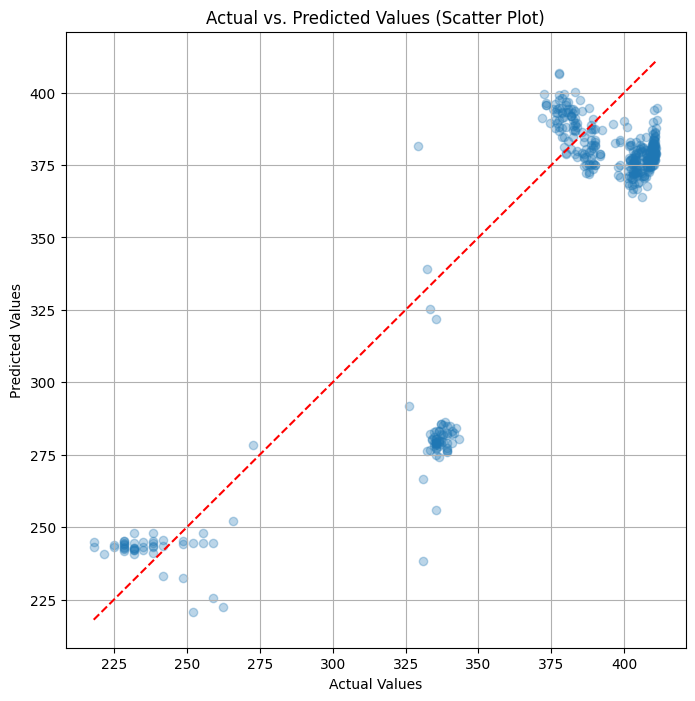

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test_w, y_pred_w, alpha=0.3)
plt.plot([y_test_w.min(), y_test_w.max()], [y_test_w.min(), y_test_w.max()], 'r--') # Diagonal line
plt.title('Actual vs. Predicted Values (Scatter Plot)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Final loss and MAE.

In [12]:
loss, mae = model.evaluate(X_test_w, y_test_w, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test Loss: 950.1934
Test MAE: 26.0609


Visualize the training and validation loss and MAE over epochs

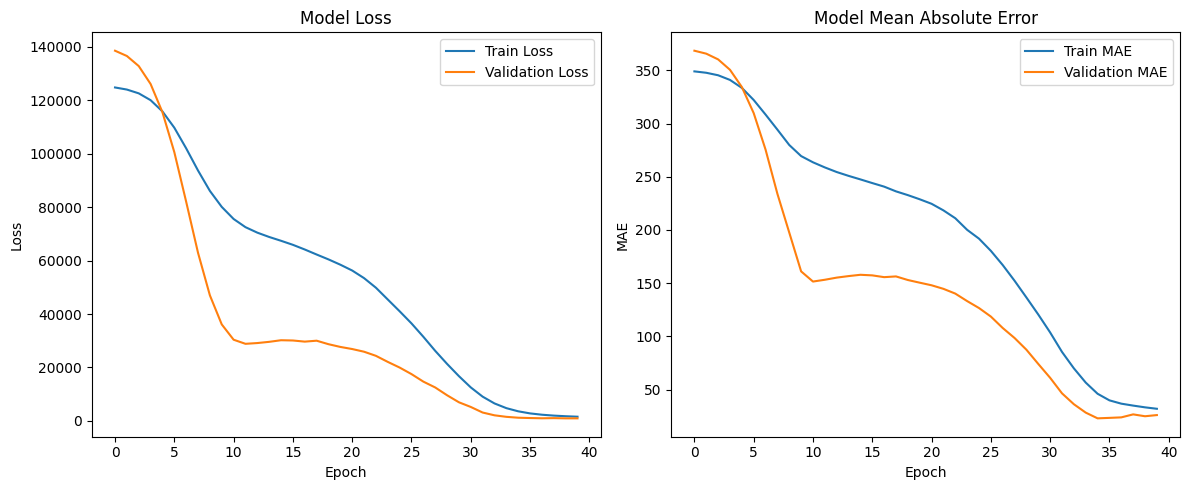

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()